## Generate Simulated Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def MakeColumnNames(col):
    columnNames = []
    for i in range(col):
        columnNames.append("x"+str(i+1))
    #columnNames.append("label")
    return columnNames

def SimulatedDataGenerator(col=2,k=3,nums=[50,65,52]):
    # col: Number of columns (features) 
    # k: Number of classes
    # nums: Array, sample numbers of each class
    # cores: Array, core coordinate of each class
    cores = []
    dataSet = np.zeros((sum(nums),col))
    
    index = 0
    step = 20/k
    for i in range(k):
        core = np.random.rand(1,2)
        core[0][0] = i*step + core[0][0]*step
        core[0][1] *= 15
        cores.append(core)

        for j in range(nums[i]):
            dot = core[0] + np.random.rand(1,2)*step - step/2
            dataSet[index] = dot
            index += 1
                
    columnNames = MakeColumnNames(col)   
    dataSet = pd.DataFrame(dataSet,columns=columnNames)
    return dataSet

In [3]:
dataSet = SimulatedDataGenerator()

## Data Visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
def visualizeDots(dataSet):
    # dataSet: pandas.DataFrame    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_title("Simulated Data")
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.scatter(dataSet.x1,dataSet.x2,c='g',alpha=0.5,s=10)
    plt.show()   

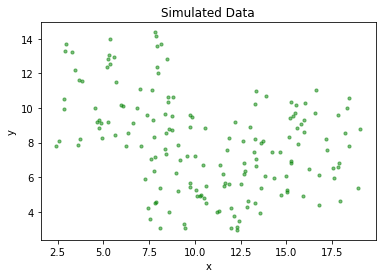

In [6]:
visualizeDots(dataSet)

## K-means Clustering

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
def distanceCal(dot1,dot2):
    # dot1: [x1,y1], coordinate of dot1
    # dot2: [x2,y2], coordinate of dot2
    dist = np.sqrt((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)
    return dist

def randomCores(dataset,k):
    # dataset: pandas.DataFrame
    # k: number of clusters
    x1_max = dataSet.x1.max()
    x1_min = dataSet.x1.min()
    x2_max = dataSet.x2.max()
    x2_min = dataSet.x2.min()
    
    cores = []
    for i in range(k):
        x = float(np.random.uniform(x1_min-1,x1_max+1,1))
        y = float(np.random.uniform(x2_min-1,x2_max+1,1))
        cores.append([x,y])
    return cores

def findCore(dataset):
    # dataset: pandas.DataFreame without label
    x1 = dataset.x1.median()
    x2 = dataset.x2.median()
    return [x1,x2]

def findCoreWithLabel(dataset):
    # dataset: pandas.DataFreame with label
    newcores = []
    labels = sorted(list(np.unique(dataset.label)))
    for lab in labels:
        subset = dataset[dataset.label == lab]
        x1,x2 = findCore(subset)
        newcores.append([x1,x2])
    return newcores
    
def findCluster(dot,cores):
    # dot: list, [x, y]
    # cores: list, core coordinates of clusters
    distances = {}
    for i in range(len(cores)):
        x1 = cores[i][0]
        x2 = cores[i][1]
        dist = distanceCal(dot,[x1,x2])
        distances[i] = dist
    cluster = max(distances, key=lambda k: distances[k])
    return cluster  

def addClusterLabel(dataset,cores):
    # dataset: pandas.DataFrame
    # cores: list, core coordinates of clusters
    nrow = dataset.shape[0]
    new = np.zeros((nrow,3))
    for index, row in dataset.iterrows():
        cluster = findCluster([row.x1,row.x2],cores)
        new[index][0] = row.x1
        new[index][1] = row.x2
        new[index][2] = cluster
    columns = ['x1','x2','label']
    dataset2 = pd.DataFrame(new,columns=columns)
    return dataset2 

def compareCores(cores,newcores,threshold=1):
    # cores: [[x1,y1],[x2,y2],[x3,y3]...]
    # newcores: [[x1',y1'],[x2',y2'],[x3',y3']...]
    # threshold: fload, maximum distance value
    tag = 0
    for i in range(len(cores)):
        dot1 = cores[i]
        dot2 = newcores[i]
        dist = distanceCal(dot1,dot2)
        if dist > threshold:
            tag += 1
            break
    if tag == 0:
        return True
    else:
        return False

def visualizeDots(dataset,cores):
    # dataSet: pandas.DataFrame
    # cores: [[x1,y1],[x2,y2],[x3,y3]...]
    colors = ['blue','green','yellow','red','oringe','pink','grey']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.xlim(0,25)
    #plt.ylim(0,20)
    
    dataset = pd.DataFrame(dataset)
    labels = list(np.unique(dataset.label.values))
    for lab in labels:
        lab = int(lab)
        subset = dataSet[dataset.label == lab]
        plt.scatter(subset.x1,subset.x2,label=lab,c=colors[lab],alpha=0.5,s=10)
    core_x = []
    core_y = []
    for core in cores:
        core_x.append(core[0])
        core_y.append(core[1])
    
    plt.scatter(core_x,core_y,label="Core",c='black',marker='+',s=40)
    plt.legend()
    plt.show()  
    
def KmeansCluster(dataset,k):
    # dataset: pandas.DataFrame
    # k: number of clusters
    n = 1
    cores = randomCores(dataset,k)
    datacluster = addClusterLabel(dataset,cores)
    newcores = findCoreWithLabel(datacluster)
    visualizeDots(datacluster,cores)
    
    while True:
        tag = compareCores(cores,newcores)
        n += 1
            
        if tag or n >= 100:
            visualizeDots(datacluster,cores)
            return datacluster,cores,n
            break
            
        else:
            n += 1
            cores = newcores
            datacluster = addClusterLabel(datacluster,cores)
            newcores = findCoreWithLabel(datacluster)  
            visualizeDots(datacluster,newcores)

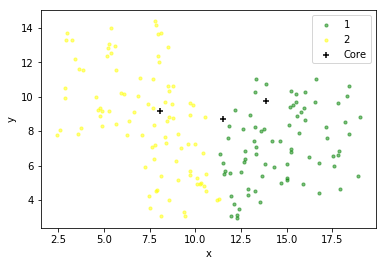

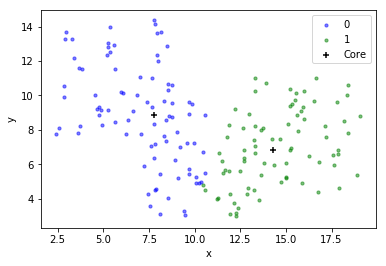

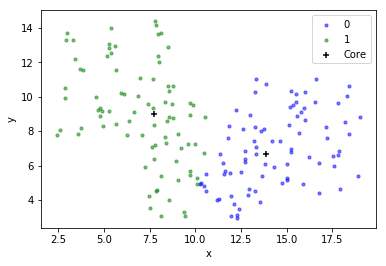

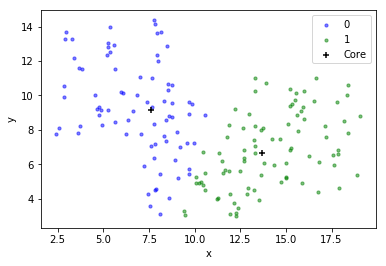

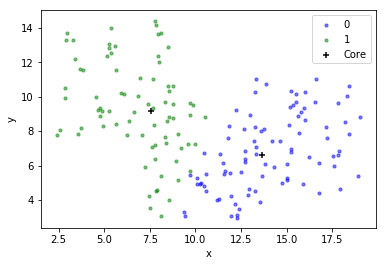

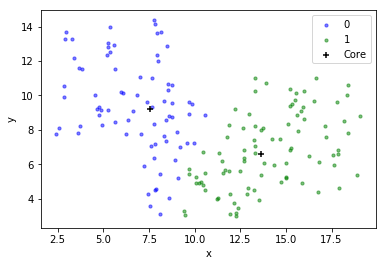

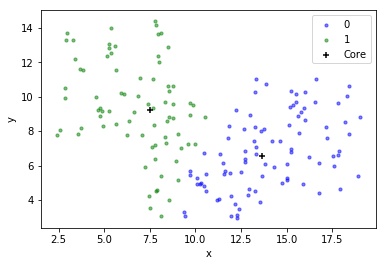

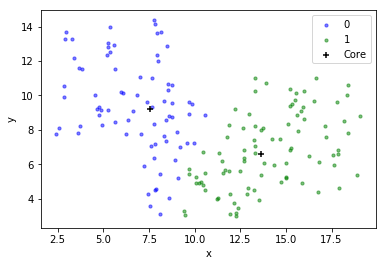

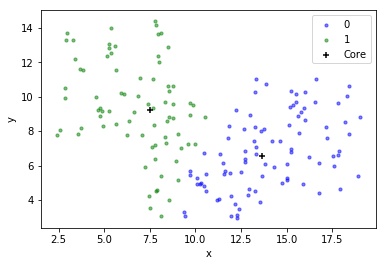

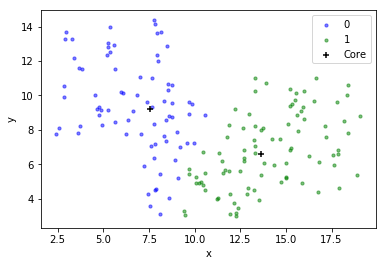

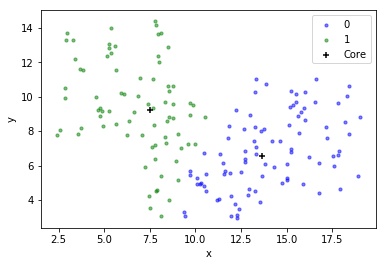

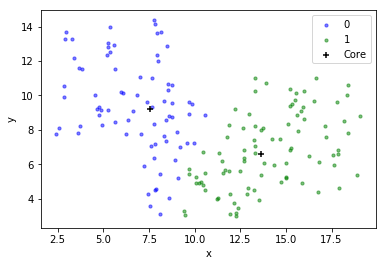

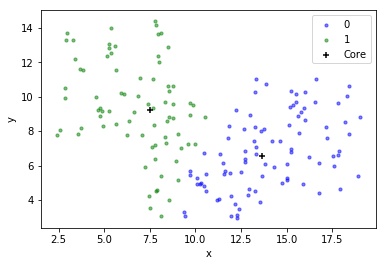

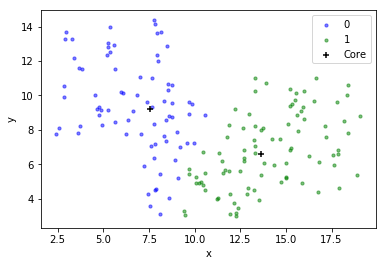

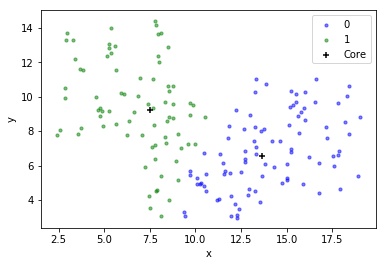

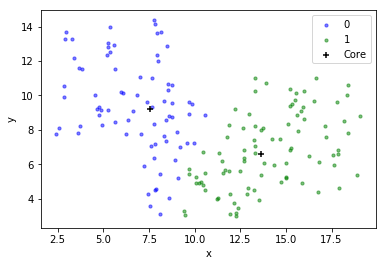

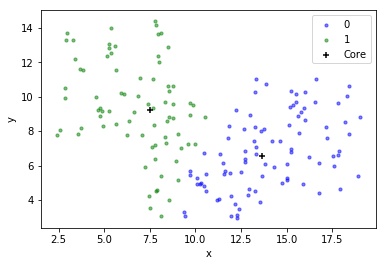

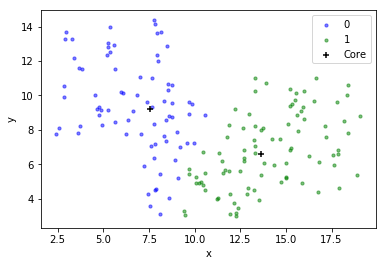

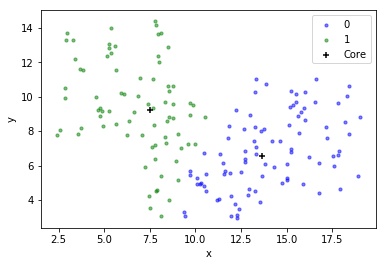

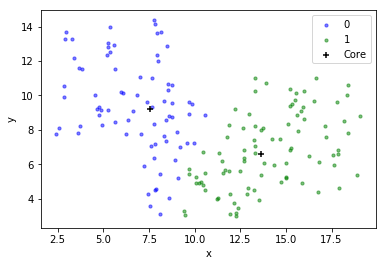

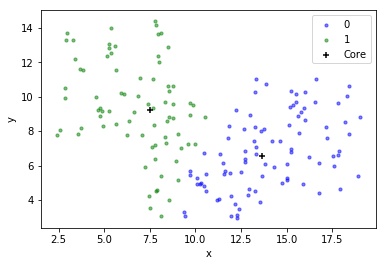

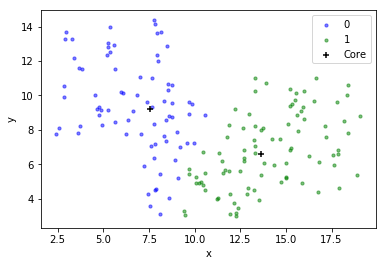

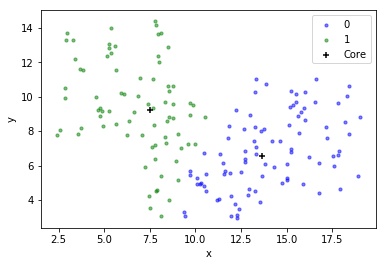

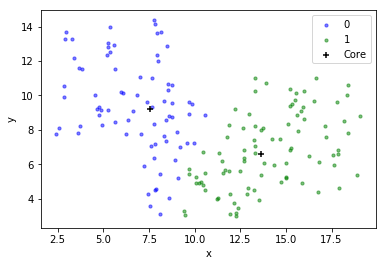

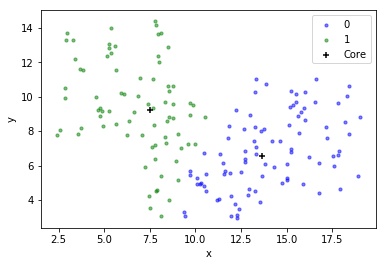

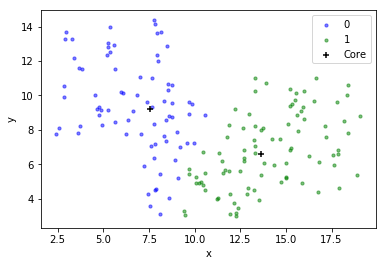

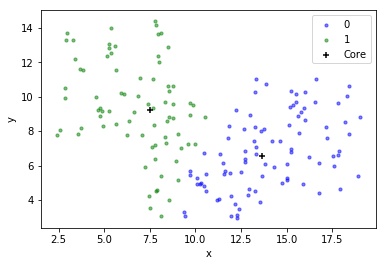

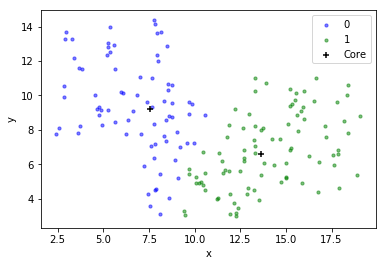

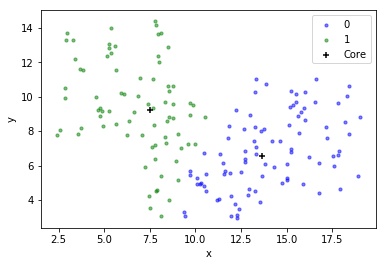

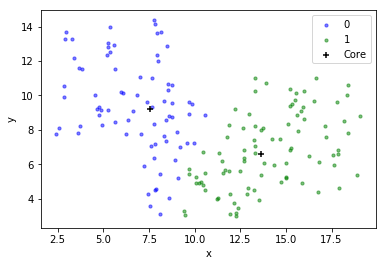

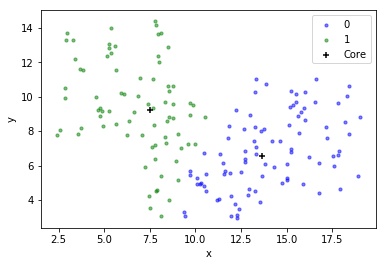

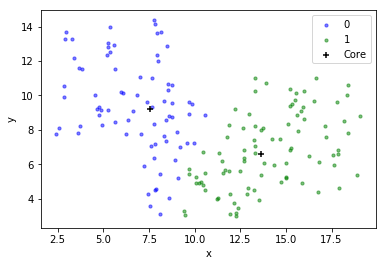

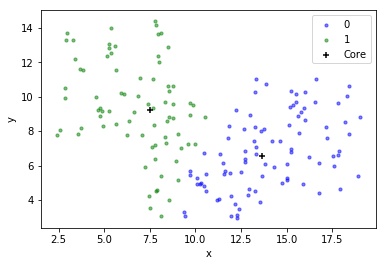

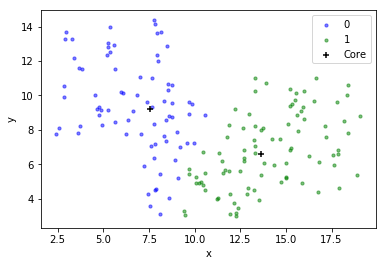

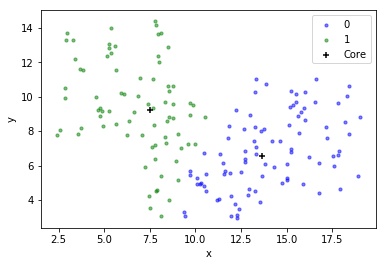

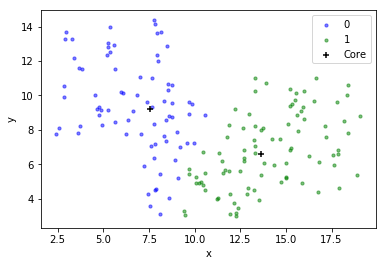

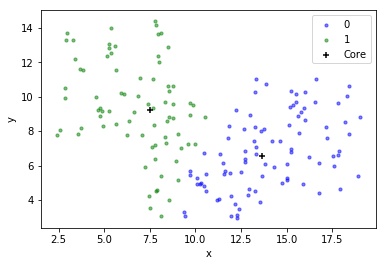

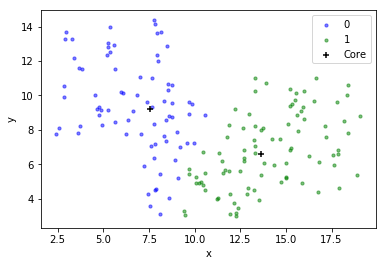

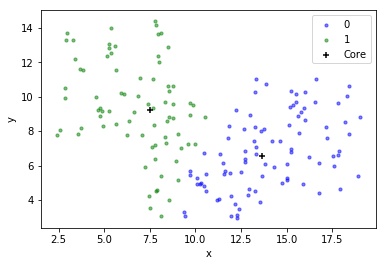

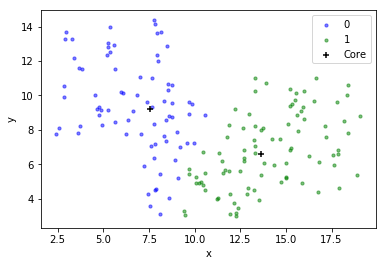

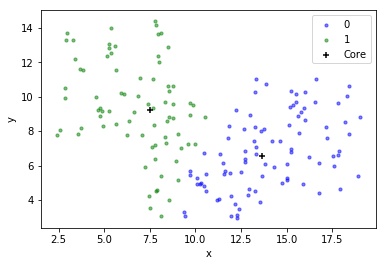

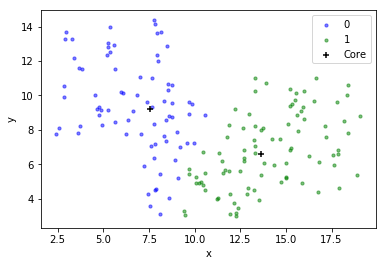

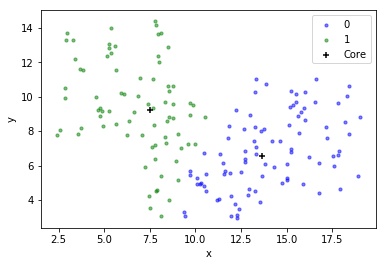

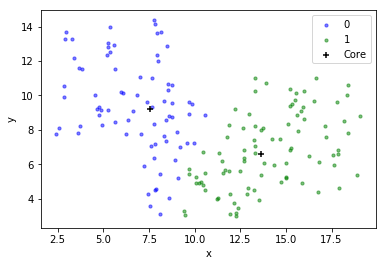

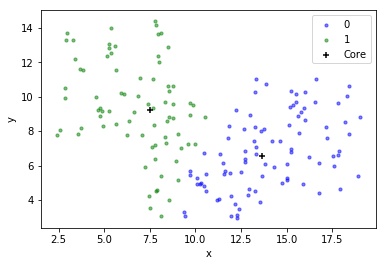

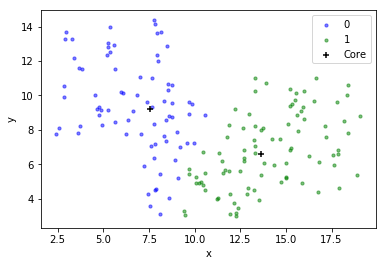

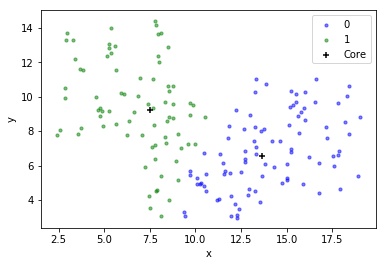

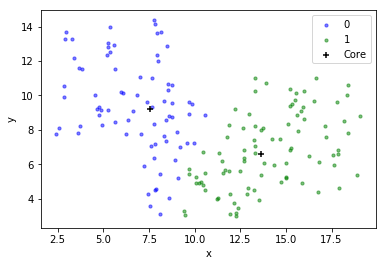

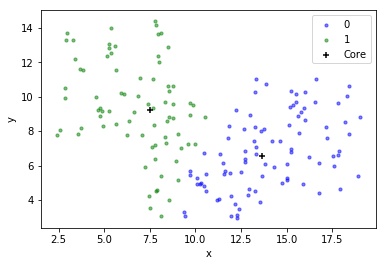

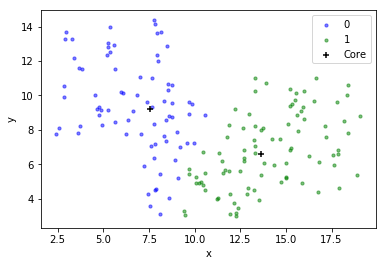

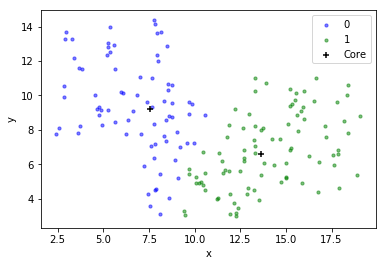

In [9]:
dataset,newcores,n = KmeansCluster(dataSet,3)

In [11]:
print(dataset.head())
print(newcores)
print(n)

         x1         x2  label
0  8.484503  12.854598    0.0
1  3.273660  13.259211    0.0
2  8.761174   8.755760    0.0
3  6.621911   9.110728    0.0
4  8.540809  10.329417    0.0
[[13.628216709974339, 6.579172982947098], [7.529464093687704, 9.207574981555531]]
100
